# Teste de Hipótese

É uma metodologia estatística que nos auxilia a tomar decisões sobre uma ou mais populações baseado na informação obtida da amostra.

Nos permite verificar se os dados amostrais trazem evidência que apoiem ou não uma hipótese estatística formulada.

Ao tentarmos tomar decisões, é conveniente a formulação de suposições ou de conjeturas sobre as populações de interesse, que, em geral, consistem em considerações sobre parâmetros $(\mu,\sigma^2,p)$ das mesmas.

Essas suposições, que podem ser ou não verdadeiras, são denominadas de Hipóteses Estatísticas.

In [111]:
from statsmodels.stats.weightstats import _zstat_generic
from statsmodels.stats.weightstats import _tstat_generic
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import math
import numpy as np
from plot import plottest   #Biblioteca própria arquivo plot.py

### Teste de hipótese para a média com variância populacional conhecida

Neste tipo de teste verificamos a hipótese de que a média populacional tenha sofrido alterações. Para isso tomamos uma amostra de forma aleatória e comparamos as duas médias. Aqui a variância populacional é conhecida, e por isso usamos como base a normal padrão (ou z-distribution).

$$ z_{obs} = \frac{\bar{x} - \mu}{\dfrac{\sigma}{\sqrt{n}}} $$

Onde: \
$\mu$ = média populacional \
$\bar{x}$ = média amostral \
$\sigma$ = desvio padrão populacional \
$n$ = tamanho amostral \
$z_{obs}$ = z-score observado

Suposições necessárias para a execução do teste:
1. As amostras devem ter sido tomadas de forma aleatória;
2. A população deve ter distribuição aproximadamente normal.


##### Exemplo 1:

Um comprador de tijolos julga que a qualidade dos tijolos está fugindo do padrão. Sabe-se pela experiência passada que a força média suportada pelos tijolos é normalmente distribuída com média igual a 400 kN e com desvio padrão de 20 kN. Uma amostra de 100 tijolos suportou uma média de 395 kN. Teste a hipótese de que a força média suportada não tenha se alterado, contra a alternativa de que tenha se modificado. Considere o nível de significância de 5%.

Resolução:
* O parâmetro de interesse é a média populacional $\mu$. 
* A melhor estimativa que temos para a média populacional é o resultado de experiências passadas $\mu = 400$. 
* O desvio padrão populacional também é conhecido de experiências passadas $\sigma = 20$.
* A hipótese nula afirma que $\mu$ mantém-se a mesma. 
* A hipótese alternativa afirma que $\mu$ foi alterada. 
* Teste bilateral.

 $ H_0: \mu=400 $ \
 $ H_a: \mu\neq400 $

$$ z_{obs} = \frac{\bar{x} - \mu}{\dfrac{\sigma}{\sqrt{n}}} = \frac{395 - 400}{\dfrac{20}{\sqrt{100}}} = -2.5 $$

> O z-score observado $z_{obs}$ indica a quantos erros padrão de distância a média amostral está da média populacional.

Para um teste bilateral, o intervalo chamado de região crítica na curva normal padrão é construído da forma $(-\infty,\Phi^{-1}(\alpha/2)] \cup [\Phi^{-1}(1-\alpha/2),\infty)$. Onde $\alpha$ é o nível de significância. \\
Neste caso, consultando a tabela padrão, obtemos o intervalo aproximado $(-\infty,-1.96] \cup [1.96,\infty)$.

Vemos que, a um nível de significância de 5%, o score $z_{obs}$ é extremo o suficiente para estar na região crítica. Rejeitamos a hipótese nula, e concluímos que a qualidade dos tijolos está sim fugindo do padrão de qualidade.



In [112]:
x = 395
mu = 400
sigma = 20
n = 100

significance = .05

zobs, pvalue = _zstat_generic(x, mu, sigma/math.sqrt(n), 'two-sided')
print("zobs = {:.4}\np-value = {:.4}\n".format(zobs, pvalue))

zc = stats.norm.ppf(significance/2)          
print("zc = {:.4}\nsignificance = {}".format(zc, significance))

# Z ~ N(0,1)
# p-value = P(Z <= -|zobs|) + P(Z >= |zobs|)
# significance = P(Z <= -|zc|) + P(Z >= |zc|)


zobs = -2.5
p-value = 0.01242

zc = -1.96
significance = 0.05


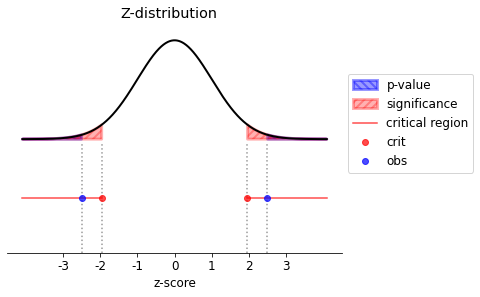

In [113]:
plottest(pvalue, significance, 'two-sided', 'z')

##### Exemplo 2:

O preço por litro de gasolina é catalogado mês a mês através de um estudo sistemático feito a partir de todos os postos do Recife. No mês anterior verificou-se que o preço médio era de R\\$5.31 com desvio padrão de R\\$0.82. O resultado do estudo deste mês ainda não foi divulgado, mas um cidadão tem a impressão de que o preço médio tenha diminuído. Ele decidiu consultar aleatóriamente 32 postos e descobriu um preço por litro médio igual a R\\$5.16. Teste a hipótese deste cidadão considerando um nível de significância de 10\%.

Resolução:
* O parâmetro de interesse é a média populacional $\mu$. 
* A melhor estimativa que temos para a média populacional é o resultado de experiências passadas $\mu = 5.31$.
* O desvio padrão populacional também é conhecido de experiências passadas $\sigma = 0.82$.
* A hipótese nula afirma que $\mu$ mantém-se a mesma.
* A hipótese alternativa afirma que $\mu$ diminuiu. 
* Teste unilateral à esquerda.

 $ H_0: \mu=5.31 $ \
 $ H_a: \mu<5.31 $ 

$$ z_{obs} = \frac{\bar{x} - \mu}{\dfrac{\sigma}{\sqrt{n}}}  = \frac{5.16 - 5.31}{\dfrac{0.82}{\sqrt{32}}} = -1.0348 $$

> O z-score observado $z_{obs}$ indica a quantos erros padrão de distância a média amostral está da média populacional.

Para um teste unilateral à esquerda, o intervalo chamado de região crítica na curva normal padrão é construído da forma $(-\infty,\Phi^{-1}(\alpha)]$. Onde $\alpha$ é o nível de significância. \
Neste caso, consultando a tabela padrão, obtemos aproximadamente o intervalo $(-\infty,-1.28]$.

Vemos que o score $z_{obs}$ não é extremo o suficiente para estar na região crítica. Portanto não rejeitamos a hipótese nula, e concluímos que a um nível de significância de 10\% não há evidências de que o preço por litro médio de gasolina tenha diminuído.


In [114]:
x = 5.16
mu = 5.31
sigma = 0.82
n = 32

significance = .1

zobs, pvalue = _zstat_generic(x, mu, sigma/math.sqrt(n), 'smaller')
print("zobs = {:.4}\np-value = {:.4}\n".format(zobs, pvalue))

zc = stats.norm.ppf(significance)          
print("zc = {:.4}\nsignificance = {}".format(zc, significance))

# Z ~ N(0,1)
# p-value = P(Z <= zobs)
# significance = P(Z <= zc)

zobs = -1.035
p-value = 0.1504

zc = -1.282
significance = 0.1


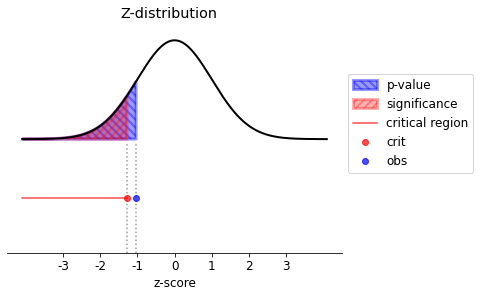

In [115]:
plottest(pvalue, significance, 'smaller', 'z')

### Teste de hipótese para a média com variância populacional desconhecida

Neste tipo de teste, também verificamos a validade da média populacional atráves de uma amostra. Porém quando o desvio padrão populacional é deconhecido, a melhor estimativa que podemos utilizar para substituí-lo é o desvio padrão amostral. Outra implicação é que obtém-se melhores aproximações ao utilizar a distribuição t-student com $n-1$ graus de liberdade. Geralmente a quantidade de amostras disponíveis é pequena (<30). 

$$ t_{obs} = \frac{\bar{x} - \mu}{\dfrac{s}{\sqrt{n}}} $$

Onde: \
$\mu$  = média populacional \
$\bar{x}$  = média amostral \
$s$  = desvio padrão amostral \
$n$  = tamanho amostral \
$t_{obs}$  = t-score observado 

Suposições necessárias para a execução do teste:
1. As amostras devem ter sido tomadas de forma aleatória;
2. A população deve ter distribuição aproximadamente normal.


##### Exemplo 1:

Os registros de avaliação dos calouros do curso de geografia são arquivados semestre a semestre, porém detalhes não são divulgados. Sabe-se apenas que a nota obtida na prova de admissão é normalmente distribuída com média 7.8. Para testar a hipótese de que a nota média da turma no semestre atual continua a mesma, foram selecionados 12 calouros aleatoriamente e eles revelaram suas próprias notas, obtendo-se uma média de 8.1 e desvio padrão de 0.6. Considere un nível de significância de 5%.

Resolução:
* O parâmetro de interesse é a média populacional $\mu$.
* A melhor estimativa que temos para a média populacional é a nota média obtida pelos registros $\mu = 7.8$.
* O desvio padrão populacional é desconhecido, porém temos o desvio padrão amostral $s = 0.6$.
* A hipótese nula afirma que $\mu$ mantém-se a mesma.
* A hipótese alternativa afirma que $\mu$ foi alterada. 
* Teste bilateral.

 $ H_0: \mu=7.8 $ \
 $ H_a: \mu\neq7.8 $

$$ t_{obs} = \frac{\bar{x} - \mu}{\dfrac{s}{\sqrt{n}}} = \frac{8.1 - 7.8}{\dfrac{0.6}{\sqrt{12}}} = 1.7321 $$

> O t-score observado $t_{obs}$ indica a quantos erros padrão de distância a média amostral está da média populacional.

Para um teste bilateral, o intervalo chamado de região crítica usando a distribuição  t-student com $n-1$ graus de liberdade é construído da forma $(-\infty,t_{\alpha/2,n-1}] \cup [t_{\alpha/2,n-1},\infty)$. Onde $\alpha$ é o nível de significância. \
Consultando a tabela da distribuição t-student, obtemos o intervalo $(-\infty,-2.201] \cup [2.201,\infty)$.

Observamos que, neste caso, o score $t_{obs}$ não pertence à região crítica. Não rejeitamos a hipótese nula, e concluímos a um nível de significância de 5\%, que não há evidências de que a nota média de admissão dos calouros tenha sofrido alterações.

In [116]:
x = 8.1
mu = 7.8
s = 0.6
n = 12

significance = .05

tobs, pvalue = _tstat_generic(x, mu, s/math.sqrt(n), n-1, 'two-sided')
print("tobs = {:.4}\np-value = {:.4}\n".format(tobs, pvalue))

tc = stats.t.ppf(significance/2, n-1)          
print("tc = {:.4}\nsignificance = {}".format(tc, significance))

# T ~ T(0,1,n-1)
# p-value = P(T <= -|tobs|) + P(T >= |tobs|)
# significance = P(T <= -|tc|) + P(T >= |tc|)

tobs = 1.732
p-value = 0.1112

tc = -2.201
significance = 0.05


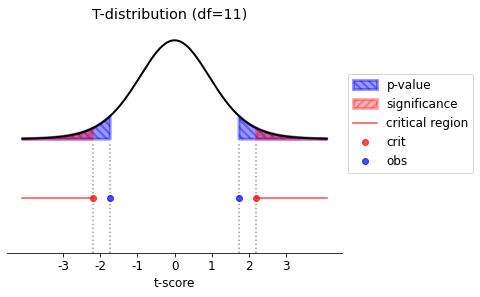

In [117]:
plottest(pvalue, significance, 'two-sided', 't', n-1)

##### Exemplo 2:

Um gamer comprou seu notebook At690 há um mês e tem percebido que o desempenho de sua máquina está abaixo do esperado, a impressão é a de que ela esteja superaquecendo com facilidade. De acordo com o fabricante a temperatura média atingida por este modelo deveria ser de 55ºC durante um uso moderado. Intrigado, este cliente decidiu monitorar a temperatura durante alguns dias e selecionou aleatóriamente 9 amostras de temperatura durante uso moderado. Os dados amostrais estão dispostos abaixo. O cliente deseja testar sua hipótese e reportar o resultado ao fabricante. Seu notebook está em tempo de garantia e por isso qualquer mínima evidência de superaquecimento será importante. Dadas as circunstâncias considere um nível de significância de 10%.

 - | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
---|---|---|---|---|---|---|---|---|---
 Temp (ºC) | 54.1 | 56.2 | 59.8 | 60.1 | 57.4 | 52.7 | 53.8 | 58.3 | 55.2 

Resolução:
* O parâmetro de interesse é a média populacional $\mu$.
* De acordo com o fabricante a média populacional é $\mu = 55$.
* O desvio padrão populacional é desconhecido, nossa melhor alternativa é utilizar o desvio padrão amostral $s$.
* A hipótese nula afirma que $\mu$ mantém-se a mesma.
* A hipótese alternativa afirma que $\mu$ é maior. 
* Teste unilateral à direita.

 $ H_0: \mu=55 $ \
 $ H_a: \mu>55 $

$$ \bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i = \frac{1}{9}(54.1+56.2+...+58.3+55.2)= 56.4 $$

$$ s = \sqrt{\frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n-1}} = \sqrt{\frac{\sum_{i=1}^{n}(x_i-56.4)^2}{9-1}} = 2.6711 $$

$$ t_{obs} = \frac{\bar{x} - \mu}{\dfrac{s}{\sqrt{n}}} = \frac{56.4 - 55}{\dfrac{2.6711}{\sqrt{9}}} = 1.5724 $$

> O t-score observado $t_{obs}$ indica a quantos erros padrão de distância a média amostral está da média populacional.

Para um teste unilateral à direita, o intervalo chamado de região crítica usando a distribuição t-student com $n-1$ graus de liberdade é construído da forma $[t_{\alpha,n-1},\infty)$. Onde $\alpha$ é o nível de significância. \
Consultando a tabela da distribuição t-student, obtemos o intervalo $[1.3968,\infty)$.

Observamos que, neste caso, o score $t_{obs}$ está além do score crítico $t_{\alpha,n-1}$, ou seja, está dentro da região crítica. Por isso rejeitamos a hipótese nula, e concluímos que a um nível de significância de 10\%, existem evidências de que este notebook esteja com problemas de superaquecimento.

In [118]:
mu = 55
n = 9
a = [54.1,56.2,59.8,60.1,57.4,52.7,53.8,58.3,55.2]
x = np.mean(a)
s = np.std(a, ddof=1)

significance = .1

tobs, pvalue = _tstat_generic(x, mu, s/math.sqrt(n), n-1, 'larger')
print("tobs = {:.4}\np-value = {:.4}\n".format(tobs, pvalue))

tc = stats.t.ppf(1-significance, n-1)          
print("tc = {:.4}\nsignificance = {}".format(tc, significance))

# T ~ T(0,1,n-1)
# p-value = P(T >= tobs)
# significance = P(T >= tc)

tobs = 1.572
p-value = 0.07726

tc = 1.397
significance = 0.1


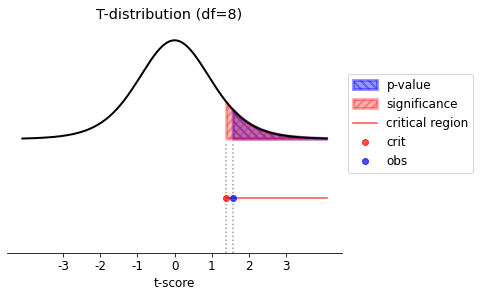

In [119]:
plottest(pvalue, significance, 'larger', 't', n-1)

### Teste de hipótese para a proporção de uma população

$$ z_{obs} = \frac{\hat{p} - p}{\sqrt{\dfrac{p(1-p)}{n}}} $$

Onde: \
$p$ = proporção populacional \
$\hat{p}$ = proporção amostral \
$n$ = tamanho amostral \
$z_{obs}$ = z-score observado


Suposições necessárias para a execução do teste:
1. As amostras devem ter sido tomadas de forma aleatória;
2. O tamanho amostral deve ser suficientemente grande e equilibrado para garantir que a distribuição das proporções amostrais seja normal. Ou seja, $np\geq10$ e também $n(1-p)\geq10$.

#### Exemplo 1:

Durante o primeiro ano de um mandato político foi conduzido um grande estudo nacional acerca da proporção da população que era a favor de um projeto de lei. O estudo revelou que apenas 32% das pessoas estavam a favor, e então o projeto foi arquivado. Durante o segundo ano do mandato, uma pequena pesquisa foi conduzida utilizando uma amostra aleatória de 105 pessoas e revelou que 36% delas eram a favor da concretização do projeto de lei. Pode-se dizer que há mais pessoas a favor do projeto de lei neste segundo ano de mandato? Considere um nível de significância de 5%.

Resolução:
* O parâmetro de interesse é a proporção populacional $p$.
* A melhor estimativa que temos para a proporção populacional é o resultado do estudo nacional $p = 0.32$. \
* A hipótese nula afirma que $p$ mantém-se a mesma. 
* A hipótese alternativa afirma que $p$ aumentou. 
* Teste unilateral à direita.

 $ H_0: p=0.32 $ \
 $ H_a: p>0.32 $ 

$$ z_{obs} = \frac{0.36 - 0.32}{\sqrt{\dfrac{0.32(1-0.32)}{105}}} = 0.87867$$ 

> O z-score observado $z_{obs}$ indica a quantos erros padrão de distância a proporção amostral está da proporção populacional.

  $ \text{p-value} = P(Z\geq0.88)=1-P(Z\leq0.88)=1-\Phi(0.88)=1-0.81057=0.18943 $

> O $\text{p-value}$, neste contexto, indica a probabilidade de obter-se proporções ainda mais extremas que a proporção amostral, supondo que a hipótese nula esteja correta. Quanto menor o $\text{p-value}$, mais certeza temos que a hipótese nula está errada, e que a hipótese alternativa está correta. O threshold desta decisão é chamado de nível de significância e é definido pelo estatístico.

Considerando um nível de significância $\alpha$ de $5\%$, vemos que a ocorrência de $\hat{p}$ não pode ser considerada tão incomum, pois $\text{p-value} > \alpha$. \
Portanto não rejeitamos a hipótese nula. Não há evidências de que a proporção de pessoas a favor do projeto de lei tenha aumentado.


In [120]:
n = 105
pnull = .32
phat = .36
significance = .05

zobs, pvalue = proportions_ztest(n*phat, n, pnull, 'larger', pnull)
print("zobs = {:.4}\np-value = {:.4}\n".format(zobs, pvalue))

zc = stats.norm.ppf(1-significance)          
print("zc = {:.4}\nsignificance = {}".format(zc, significance))

# Z ~ N(0,1)
# p-value = P(Z >= zobs)
# significance = P(Z >= zc)

zobs = 0.8787
p-value = 0.1898

zc = 1.645
significance = 0.05


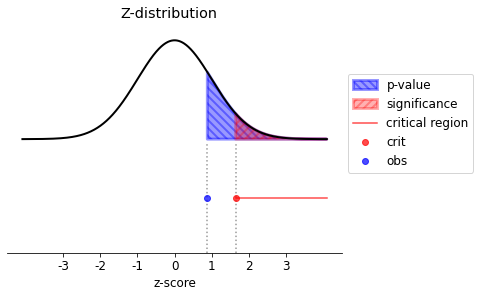

In [121]:
plottest(pvalue, significance, 'larger', 'z')

### Teste de hipótese para amostras dependentes

Podemos utilizar um teste t para testar a diferença de duas médias populacionais a partir de duas amostras, uma de cada população. As duas amostras são ditas dependentes pois cada elemento de uma deve estar emparelhado com um elemento da outra. 

$$ t_{obs} = \frac{\bar{x}_d - \mu_d}{\dfrac{s_d}{\sqrt{n}}} $$

Onde: \
$\bar{x}_d$ = média das diferenças amostrais \
$\mu_d$ = média das diferenças populacionais \
$s_d$ = desvio padrão das diferenças amostrais \
$n$ = tamanho amostral \
$t_{obs}$ = t-score observado



##### Exemplo 1:

Uma pesquisa de mercado está sendo conduzida para verificar a diferença de preço entre produtos iguais em supermercados diferentes. O supermercado A fica localizado no centro da cidade e o supermercado B no subúrbio. Todos os produtos comuns aos dois estabelecimentos foram catalogados e 11 foram selecionados aleatoriamente. Kátia mora no subúrbio e afirma que no supermercado B os produtos são mais baratos. Teste a hipótese dessa cliente com um nível de significâcia de 5%.

Preços (R\$)| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11
---|---|---|---|---|---|---|---|---|---|---|---
Mercado A | 24 | 66 | 72 | 151 | 102 | 125 | 83 | 166 | 110 | 88 | 110
Mercado B | 21 | 67 | 61 | 148 | 106 | 117 | 79 | 167 | 102 | 87 | 115  

Resolução:
* O parâmetro de interesse é a diferença entre as médias populacionais $\mu_A-\mu_B=\mu_d$. Onde os índices $A$ e $B$ referem-se aos supermercados.
* A hipótese nula afirma que os preços não são menores no supermercado B.
* A hipótese alternativa afirma que os preços são menores no supermercado B.
* Teste unilateral à direita.

$H_0:\mu_A\leq\mu_B\Rightarrow\mu_A-\mu_B\leq0\Rightarrow\mu_d\leq0$ \
$H_a:\mu_A>\mu_B\Rightarrow\mu_A-\mu_B>0\Rightarrow\mu_d>0$ 

 - | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11
---|---|---|---|---|---|---|---|---|---|---|---
Diferenças (R\$) | 6 | -1 | 11 | 14 | -4 | 8 | 8 | -6 | 14 | 1 | -5

$$\bar{x_d}=\frac{1}{n}\sum_{i=1}^nd_i=\frac{1}{11}(6-1+...-5)=4.1818$$
$$ s_d = \sqrt{\frac{\sum_{i=1}^{n}(d_i-\bar{x_d})^2}{n-1}} = \sqrt{\frac{\sum_{i=1}^{n}(d_i-4.1818)^2}{11-1}} = 7.5076$$
$$ t_{obs} = \frac{\bar{x_d} - \mu_d}{\dfrac{s_d}{\sqrt{n}}} =\frac{4.1818 - 0}{\dfrac{7.5076}{\sqrt{11}}}=1.847$$

> O t-score observado $t_{obs}$ indica a quantos erros padrão de distância a média das diferenças amostrais está da média das diferenças populacionais.

Para um teste unilateral à direita, o intervalo chamado de região crítica usando a distribuição t-student com $n-1$ graus de liberdade é construído da forma $[t_{\alpha,n-1},\infty)$. Onde $\alpha$ é o nível de significância. \
Consultando a tabela da distribuição t-student, obtemos o intervalo $[1.812,\infty)$.

Observamos que o score $t_{obs}$ está por muito pouco dentro da região crítica. Rejeitamos a hipótese nula, e concluímos que a um nível de significância de 5\%, existem evidências de que o preço dos produtos são mais baratos no supermercado B. 

Em casos como este em que o $\text{p-value}$ resulta em algo muito próximo da significância, pode ser necessária uma segunda execução do teste, porém com um maior tamanho amostral. Para que assim reforcemos a decisão tomada. 


In [122]:
mu_d = 0
n = 11
a = [24,66,72,151,102,125,83,166,110,88,110]
b = [18,67,61,137,106,117,75,172,96,87,115]
d = [i-j for i,j in zip(a,b)]
xbar_d = np.mean(d)
s_d = np.std(d, ddof=1)

significance = .05

tobs, pvalue = _tstat_generic(xbar_d, mu_d, s_d/math.sqrt(n), n-1, 'larger')
print("tobs = {:.4}\np-value = {:.4}\n".format(tobs, pvalue))

tc = stats.t.ppf(1-significance, n-1)          
print("tc = {:.4}\nsignificance = {}".format(tc, significance))

# T ~ T(0,1,n-1)
# p-value = P(T >= tobs)
# significance = P(T >= tc)


tobs = 1.847
p-value = 0.04722

tc = 1.812
significance = 0.05


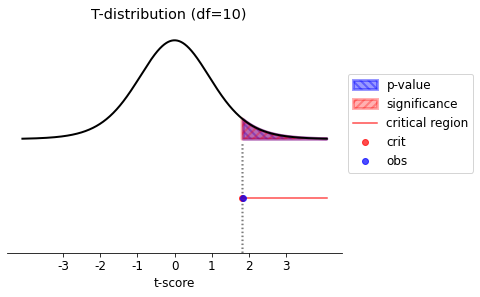

In [123]:
plottest(pvalue,significance,'larger','t',n-1)

### Teste de hipótese para amostras independentes e variâncias populacionais conhecidas

Este é o tipo de teste capaz de verificar se existem diferenças significativas em relação à média de duas populações. São tomadas duas amostras, uma de cada população, que devem ser independentes e de caráter aleatório. Esta abordagem também assume que as variâncias populacionais são conhecidas. Utilizamos a distribuição z (normal padrão).

$$ z_{obs} = \frac{(\bar{x}_1-\bar{x}_2)-(\mu_1-\mu_2)}{\sqrt{\dfrac{\sigma^2_1}{n_1}+\dfrac{\sigma^2_2}{n_2}}} $$

Onde: \
$\bar{x}_1 - \bar{x}_2$ = diferença entre as médias amostrais 1 e 2 \
$\mu_1 - \mu_2$ = diferença entre as médias populacionais 1 e 2 \
$\sigma_1,\sigma_2$ = desvios padrão das populações 1 e 2 \
$n_1,n_2$ = tamanho das amostras 1 e 2 \
$z_{obs}$ = z-score observado


#### Exemplo 1:

Uma rede de calçados afirma que há um diferença significativa entre os valores médios das compras realizadas por mulheres entre 18 e 27 anos (A), e mulheres entre 28 e 37 anos (B). A partir de levantamentos de dados passados, sabe-se que o desvio padrão das compras feitas por mulheres do grupo A é de R\\$25.22, enquanto que o desvio para as mulheres do grupo B é de R\\$36.67. Neste mês foi conduzida uma pesquisa onde foram escolhidas aleatóriamente 120 mulheres de cada grupo, e assim foi revelado um valor médio de compra de R\\$183.85 para as mulheres de 18 a 27 anos, e um valor médio de R\\$194.71 para as com idade entre 28 e 37 anos. Verifique a hipótese da rede de calçados a um nível de significância de 5%.

Resolução:
* O parâmetro de interesse é a diferença entre as médias populacionais $\mu_A-\mu_B$. Onde os índices $A$ e $B$ referem-se às mulheres nas duas diferentes faixas de idade.
* A hipótese nula afirma que os valores médios de compra são iguais.
* A hipótese alternativa afirma que os valores médios de compra são diferentes. 
* Teste bilateral.

$H_0:\mu_A=\mu_B\Rightarrow\mu_A-\mu_B=0$ \
$H_a:\mu_A\neq\mu_B\Rightarrow\mu_A-\mu_B\neq0$ 

$$ z_{obs} = \frac{(\bar{x_A}-\bar{x_B})-(\mu_A-\mu_B)}{\sqrt{\dfrac{\sigma^2_A}{n_A}+\dfrac{\sigma^2_B}{n_B}}} = \frac{(183.85-194.71)-0}{\sqrt{\dfrac{25.22^2}{120}+\dfrac{36.67^2}{120}}} = -2.673$$

> O z-score observado $z_{obs}$ indica a quantos erros padrão de distância a diferença entre as médias amostrais está da diferença entre as médias populacionais.

Para um teste bilateral, o intervalo chamado de região crítica na curva normal padrão é construído da forma $(-\infty,\Phi^{-1}(\alpha/2)] \cup [\Phi^{-1}(1-\alpha/2),\infty)$. Onde $\alpha$ é o nível de significância. \
Neste caso, consultando a tabela padrão, obtemos o intervalo aproximado $(-\infty,-1.96] \cup [1.96,\infty)$.

A um nível de significância de 5%, o score $z_{obs}$ é negativamente extremo o suficiente para estar dentro da região crítica. Portanto rejeitamos a hipótese nula, e concluímos que sim, há diferença entre os valores médios das compras feitas por mulheres de 18 a 27 anos e por mulheres de 28 a 37 anos.

In [124]:
x_a = 183.85
x_b = 194.71
n_a = 120
n_b = 120
sigma_a = 25.22
sigma_b = 36.67

significance = .05

zobs, pvalue = _zstat_generic(x_a, x_b, math.sqrt(sigma_a**2/n_a+sigma_b**2/n_b), 'two-sided')
print("zobs = {:.4}\np-value = {:.4}\n".format(zobs, pvalue))

zc = stats.norm.ppf(significance/2)          
print("zc = {:.4}\nsignificance = {}".format(zc, significance))

# Z ~ N(0,1)
# p-value = P(Z <= |zobs|) + P(Z >= |zobs|)
# significance = P(Z <= |zc|) + P(Z >= |zc|)

zobs = -2.673
p-value = 0.007517

zc = -1.96
significance = 0.05


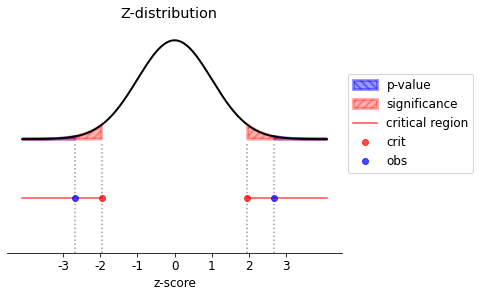

In [125]:
plottest(pvalue, significance, 'two-sided', 'z')

### Teste de hipótese para amostras independentes e variâncias populacionais desconhecidas e iguais


Este tipo de teste deve ser aplicado quando forem tomadas duas amostras independentes, aleatórias e de distribuição normal, de cada população. Deve-se saber a priori que as variâncias populacionais são iguais, mesmo que sejam desconhecidas. A estatística se baseia na distribuição t-student com $n_1-n_2-2$ graus de liberdade.

$$ t_{obs} = \frac{(\bar{x}_1-\bar{x}_2)-(\mu_1-\mu_2)}{\sqrt{\dfrac{(n_1-1)s^2_1+(n_2-1)s^2_2}{n_1+n_2-2}}\sqrt{\dfrac{n_1+n_2}{n_1n_2}}} $$

Onde: \
$\bar{x}_1 - \bar{x}_2$ = diferença entre as médias amostrais 1 e 2 \
$\mu_1 - \mu_2$ = diferença entre as médias populacionais 1 e 2 \
$s_1, s_2$ = desvios padrão das amostras 1 e 2 \
$n_1,n_2$ = tamanho das amostras 1 e 2 \
$t_{obs}$ = z-score observado

#### Exemplo 1:

Um órgão regulamentador nacional exige que camisas de tamanho M fabricadas em seu território tenham a mesma variância em questão à largura. Um fabricante A afirma que a forma de suas camisas M são levemente menores que as vendidas pelo seu principal concorrente B. Para isso foi conduzida uma pesquisa usando 11 camisas deste fabricante e 9 camisas do concorrente. Os resultados foram os seguintes:
* Fabricante: média de 53.03 e desvio padrão de 0.22 (cm)
* Concorrente: média de 53.21 e desvio padrão de 0.3 (cm)

Ao nível de significância de 5%, pode-se afirmar como correta a hipótese deste fabricante?

Resolução:
* O parâmetro de interesse é a diferença entre as médias populacionais $\mu_A-\mu_B$. Onde os índices $A$ e $B$ referem-se aos fabricantes de camisas M.
* A hipótese nula afirma que o tamanho médio das camisas do fabricante A não é menor.
* A hipótese alternativa afirma que o tamanho médio das camisas do fabricante A é menor. 
* Teste unilateral à esquerda.

$H_0:\mu_A\geq\mu_B\Rightarrow\mu_A-\mu_B\geq0$ \
$H_a:\mu_A<\mu_B\Rightarrow\mu_A-\mu_B<0$ 

$$ t_{obs} = \frac{(\bar{x_A}-\bar{x_B})-(\mu_A-\mu_B)}{\sqrt{\dfrac{(n_A-1)s^2_A+(n_B-1)s^2_B}{n_A+n_B-2}}\sqrt{\dfrac{n_A+n_B}{n_An_B}}} = \frac{(53.03-53.21)-0}{\sqrt{\dfrac{(11-1)0.22^2+(9-1)0.3^2}{11+9-2}}\sqrt{\dfrac{11+9}{(11)(9)}}} = -1.5485$$

> O t-score observado $t_{obs}$ indica a quantos erros padrão de distância a diferença entre as médias amostrais está da diferença entre as médias populacionais.

Para um teste unilateral à esquerda, o intervalo chamado de região crítica usando a distribuição t-student com $n_A+n_B-2$ graus de liberdade é construído da forma $(-\infty,-t_{\alpha,n_A+n_B-2}]$. Onde $\alpha$ é o nível de significância. \
Consultando a tabela da distribuição t-student, obtemos o intervalo $(-\infty,-1.734]$.

Observamos que, neste caso, o score $t_{obs}$ está fora da região crítica. Por isso não rejeitamos a hipótese nula, e concluímos que a um nível de significância de 5\%, não existem evidências de que o tamanho das camisas de tamanho M do fabricante A sejam menores que as do seu principal concorrente.

In [126]:
x_a = 53.03
x_b = 53.21
n_a = 11
n_b = 9
s_a = .22
s_b = .3

significance = .05

tobs, pvalue = _tstat_generic(x_a, x_b, math.sqrt(((n_a-1)*s_a**2+(n_b-1)*s_b**2)/(n_a+n_b-2)) * math.sqrt((n_a+n_b)/(n_a*n_b)), n_a+n_b-2, 'smaller')
print("tobs = {:.4}\np-value = {:.4}\n".format(tobs, pvalue))

tc = stats.t.ppf(significance, n_a+n_b-2)          
print("tc = {:.4}\nsignificance = {}".format(tc, significance))

# T ~ T(0,1,n_a+n_b-2)
# p-value = P(T <= tobs)
# significance = P(T <= tc)

tobs = -1.548
p-value = 0.06946

tc = -1.734
significance = 0.05


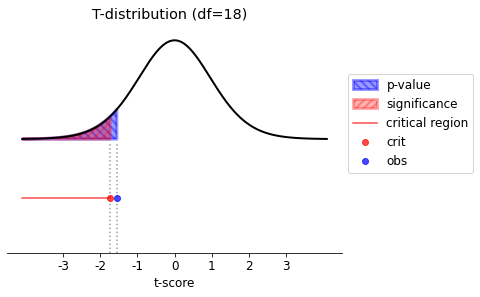

In [127]:
plottest(pvalue, significance, 'smaller', 't', n_a+n_b-2)

### Teste de hipótese para amostras independentes e variâncias populacionais desconhecidas e diferentes

Teste feito a partir de duas amostras independentes, aleatórias e com distribuição normal. Neste caso sabe-se que as variâncias populacionais são diferentes, porém descohecidas. A estatística do teste se baseia na distribuição t-student com graus de liberdade igual ao mínimo entre $n_1-1$ e $n_2-1$. 

$$ t_{obs} = \frac{(\bar{x}_1-\bar{x}_2)-(\mu_1-\mu_2)}{\sqrt{\dfrac{s^2_1}{n_1}+\dfrac{s^2_2}{n_2}}} $$

Onde: \
$\bar{x}_1 - \bar{x}_2$ = diferença entre as médias amostrais 1 e 2 \
$\mu_1 - \mu_2$ = diferença entre as médias populacionais 1 e 2 \
$s_1, s_2$ = desvios padrão das amostras 1 e 2 \
$n_1,n_2$ = tamanho das amostras 1 e 2 \
$t_{obs}$ = z-score observado


#### Exemplo 1:

Numa escola de aletismo, foram selecionadas aleatoriamente 10 mulheres e 8 homens para que fosse registrados seus saltos em distância. As mulheres obtiveram uma média de 6.91m com desvio padrão de 4cm. Já os homens conseguiram uma média de 6.96m com desvio padrão de 10cm. Verifique a um nível de significância de 5% se existe uma diferença na média da distância atingida entre os atletas dos dois sexos. Assuma que as populações são normalmente distribuídas com variâncias distintas.

Resolução:
* O parâmetro de interesse é a diferença entre as médias populacionais $\mu_M-\mu_H$. Onde os índices $M$ e $H$ referem-se aos grupos de mulheres e homens.
* A hipótese nula afirma que a distância média alcançada é igual para ambos os sexos.
* A hipótese alternativa afirma que a disância média alcançada é diferente. 
* Teste bilateral.

$H_0:\mu_M=\mu_H\Rightarrow\mu_M-\mu_H=0$ \
$H_a:\mu_M\neq\mu_H\Rightarrow\mu_M-\mu_H\neq0$

$$ t_{obs} = \frac{(\bar{x}_M-\bar{x}_H)-(\mu_M-\mu_H)}{\sqrt{\dfrac{s^2_M}{n_M}+\dfrac{s^2_H}{n_M}}} = \frac{(6.91-6.96)-0}{\sqrt{\dfrac{0.04^2}{10}+\dfrac{0.1^2}{8}}} = -1.3316$$

> O t-score observado $t_{obs}$ indica a quantos erros padrão de distância a diferença entre as médias amostrais está da diferença entre as médias populacionais.

Para um teste bilateral, o intervalo chamado de região crítica na curva normal padrão é construído da forma $(-\infty,-t_{\alpha/2,min(n_M-1,n_H-1)}] \cup [t_{\alpha/2,min(n_M-1,n_H-1)},\infty)$. Onde $\alpha$ é o nível de significância. \
Neste caso, consultando a tabela padrão, obtemos o intervalo aproximado $(-\infty,-2.365] \cup [2.365,\infty)$.
.
Vemos que, a um nível de significância de 5%, o score $t_{obs}$ é menor em valor absoluto quando comparado ao score crítico. Por isso não rejeitamos a hipótese nula, e concluímos que não há diferença significativa entre as distâncias atingidas por mulheres e homens durante a prova de salto em distância.

In [128]:
x_m = 6.91
x_h = 6.96
s_m = .04
s_h = .1
n_m = 10
n_h = 8

significance = .05

tobs, pvalue = _tstat_generic(x_m, x_h, math.sqrt((s_m**2/n_m) + (s_h**2/n_h)), np.min([n_m-1,n_h-1]), 'two-sided')
print("tobs = {:.4}\np-value = {:.4}\n".format(tobs, pvalue))

tc = stats.t.ppf(significance/2, np.min([n_m-1,n_h-1]))          
print("tc = {:.4}\nsignificance = {}".format(tc, significance))

# T ~ T(0,1,min(n_m-1,n_h-1))
# p-value = P(T <= -|tobs|) + P(T >= |tobs|)
# significance = P(T <= -|tc|) + P(T >= |tc|)

tobs = -1.332
p-value = 0.2247

tc = -2.365
significance = 0.05


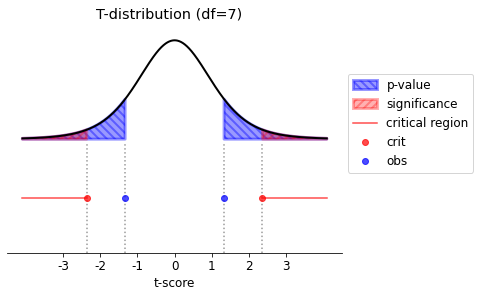

In [129]:
plottest(pvalue, significance, 'two-sided', 't', np.min([n_m-1,n_h-1]))

### Teste de hipótese para a igualdade de proporções de duas populações

Teste realizado para testar a diferença entre proporções de duas população. As amostras devem ser tomadas aleatoriamente de cada população. Neste caso, a estatística do teste é baseada na distribuição normal padrão.

$$ z_{obs} = \frac{(\hat{p_1}-\hat{p_2})-(p_1-p_2)}{\sqrt{\hat{p}(1-\hat{p})\bigg(\dfrac{1}{n_1}+\dfrac{1}{n_2}\bigg)}} $$

Onde: \
$\hat{p}_1, \hat{p}_2$ = proporções das amostras 1 e 2 \
$p_1, p_2$ = proporções populacionais 1 e 2 \
$n_1,n_2$ = tamanho das amostras 1 e 2 \
$\hat{p}$ = estimativa ponderada, tal que

$$ \hat{p}=\dfrac{n_1\hat{p}_1 + n_2\hat{p}_2}{n_1+n_2} $$

#### Exemplo 1:

Em um estudo conduzido numa universidade, 265 alunos de graduação e 51 alunos de mestrado foram selecionados aleatoriamente, 26% dos graduandos e 37% dos mestrandos afirmaram que dormem menos que 5 horas por dia. A coordenação de curso afirma que devido ao excesso de atividades, a proporção de alunos que dormem menos que 5 horas é maior entre os mestrandos. Teste a hipótese acima com um nível de significância de 10%.

Resolução:
* O parâmetro de interesse é a diferença entre as proporções populacionais $p_M-p_G$. Onde os índices $M$ e $G$ referem-se aos grupos de mestrandos e graduandos.
* A hipótese nula afirma que a proporção de mestrandos que dormem menos que 5 horas não é maior que a de graduandos.
* A hipótese alternativa afirma que a proporção de mestrandos que dormem menos que 5 horas é maior que a de graduandos. 
* Teste unilateral à direita.

$H_0:p_M\leq p_G\Rightarrow p_M-p_G\leq0$ \
$H_a:p_M>p_G\Rightarrow p_M-p_G>0$

$$ \hat{p}=\dfrac{n_M\hat{p}_M + n_G\hat{p}_G}{n_M+n_G} = \dfrac{51(0.37)+265(0.26)}{51+265} = 0.2778$$

$$ z_{obs} = \frac{(\hat{p}_M-\hat{p}_G)-(p_M-p_G)}{\sqrt{\hat{p}(1-\hat{p})\bigg(\dfrac{1}{n_M}+\dfrac{1}{n_G}\bigg)}} = \frac{(0.37-0.26)-0}{\sqrt{0.2778(1-0.2778)\bigg(\dfrac{1}{51}+\dfrac{1}{265}\bigg)}} = 1.606$$

> O z-score observado $z_{obs}$ indica a quantos erros padrão de distância a diferença entre as proporções amostrais está da diferença entre as proporções populacionais.

Para um teste unilateral à direita, o intervalo chamado de região crítica na curva normal padrão é construído da forma $[\Phi^{-1}(1-\alpha),\infty)$. Onde $\alpha$ é o nível de significância. \
Neste caso, consultando a tabela padrão, obtemos aproximadamente o intervalo $[1.28,\infty)$.

A um nível de significância de 10%, o score $z_{obs}$ é grande o suficiente para estar dentro da região crítica. Portanto rejeitamos a hipótese nula, e concluímos que sim, a proporção de mestrandos que dormem menos que 5 horas por dia é maior que a de graduandos.


In [130]:
phat_m = .37
phat_g = .26
n_m = 51
n_g = 265
phat = (n_m*phat_m+n_g*phat_g)/(n_m+n_g)

significance = .1

zobs, pvalue = _zstat_generic(phat_m, phat_g, math.sqrt(phat*(1-phat)*(1/n_m+1/n_g)), 'larger')
print("zobs = {:.4}\np-value = {:.4}\n".format(zobs, pvalue))

zc = stats.norm.ppf(1-significance)          
print("zc = {:.4}\nsignificance = {}".format(zc, significance))

# Z ~ N(0,1)
# p-value = P(Z >= zobs)
# significance = P(Z >= zc)

zobs = 1.606
p-value = 0.05412

zc = 1.282
significance = 0.1


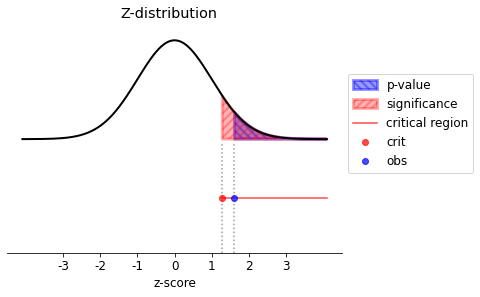

In [131]:
plottest(pvalue, significance, 'larger', 'z')